In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from IPython.display import Image, display

In [2]:
model = tf.keras.models.load_model('my_model')
class_names = ['%', '*', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '[', ']']

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)         

In [26]:
img_path = "test images/4.png"
display(Image(filename=img_path)) 
img = keras.preprocessing.image.load_img(
    img_path, target_size=(28, 28), grayscale=True
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 4 with a 100.00 percent confidence.


In [27]:
def predict_image(img):
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    return (class_names[np.argmax(score)], 100 * np.max(score))

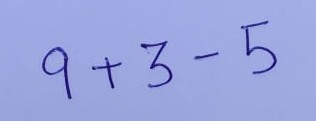

('9', 98.79574179649353)
('+', 99.32170510292053)
('3', 99.99513626098633)
('-', 99.91315007209778)
('5', 99.1050124168396)
Equation: 9 + 3 - 5 
Solution: 7


In [55]:
from preprocess import extract_patterns

img_path = "test images/test1.jpeg"
display(Image(filename=img_path)) 
patterns = extract_patterns(img_path)
eq = ''

for pattern in patterns:
    patrern_string = predict_image(pattern)
    print(patrern_string)
    eq = eq +  str(patrern_string[0]) + " "

print("Equation:", eq)
print("Solution:", eval(eq))